# Stock prices dataset
The data is of tock exchange's stock listings for each trading day of 2010 to 2016.

## Description
A brief description of columns.
- open: The opening market price of the equity symbol on the date
- high: The highest market price of the equity symbol on the date
- low: The lowest recorded market price of the equity symbol on the date
- close: The closing recorded price of the equity symbol on the date
- symbol: Symbol of the listed company
- volume: Total traded volume of the equity symbol on the date
- date: Date of record

In this assignment, we will work on the stock prices dataset named "prices.csv". Task is to create a Neural Network to classify closing price for a stock based on some parameters.

In [166]:
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

## Question 1

### Load the data
- load the csv file and read it using pandas
- file name is prices.csv

In [167]:
# run this cell to upload file using GUI if you are using google colab

# from google.colab import files
# files.upload()

In [209]:
# run this cell to to mount the google drive if you are using google colab

from google.colab import drive
drive.mount('/content/drive')
project_path = '/content/drive/My Drive/assignments/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [210]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import metrics
from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [211]:
#Loading data
prices = pd.read_csv(project_path + "prices.csv")

In [212]:
prices.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [213]:
prices.shape

(851264, 7)

## Question 2

### Drop null
- Drop null values if any

In [214]:
prices.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

No null values found in  the dataset in any of the columns.

In [215]:
prices.dropna(inplace=True) #Though no null value still drop null values

In [216]:
prices.shape

(851264, 7)

No column dropped.

### Drop columns
- Now, we don't need "date", "volume" and "symbol" column
- drop "date", "volume" and "symbol" column from the data


In [217]:
prices.drop(['date', 'volume', 'symbol'], axis=1, inplace=True)

## Question 3

### Print the dataframe
- print the modified dataframe

In [218]:
prices.head()

,open,close,low,high
0,123.430000,125.839996,122.309998,126.250000
1,125.239998,119.980003,119.940002,125.540001
2,116.379997,114.949997,114.930000,119.739998
3,115.480003,116.620003,113.500000,117.440002
4,117.010002,114.970001,114.089996,117.330002


In [219]:
prices.tail()

,open,close,low,high
851259,103.309998,103.199997,102.849998,103.930000
851260,43.070000,43.040001,42.689999,43.310001
851261,53.639999,53.529999,53.270000,53.740002
851262,44.730000,45.450001,44.410000,45.590000
851263,54.200001,53.630001,53.389999,54.480000


### Get features and label from the dataset in separate variable
- Let's separate labels and features now. We are going to predict the value for "close" column so that will be our label. Our features will be "open", "low", "high"
- Take "open" "low", "high" columns as features
- Take "close" column as label

In [220]:
X = prices.drop('close', axis=1)
y = prices.drop(['open', 'low', 'high'], axis=1)

In [221]:
X.head()

,open,low,high
0,123.430000,122.309998,126.250000
1,125.239998,119.940002,125.540001
2,116.379997,114.930000,119.739998
3,115.480003,113.500000,117.440002
4,117.010002,114.089996,117.330002


In [222]:
y.head()

,close
0,125.839996
1,119.980003
2,114.949997
3,116.620003
4,114.970001


## Question 4

### Create train and test sets
- Split the data into training and testing

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Question 5

### Scaling
- Scale the data (features only)
- Use StandarScaler

In [225]:
scaler = StandardScaler()

In [227]:
X_train_trans = scaler.fit_transform(X_train)
X_test_trans = scaler.fit_transform(X_test)

In [232]:
X_train_trans.shape

(595884, 3)

In [231]:
X_test_trans.shape

(255380, 3)

## Question 6

### Convert data to NumPy array
- Convert features and labels to numpy array

In [233]:
X_train_trans = np.array(X_train_trans)
X_test_trans = np.array(X_test_trans)

In [234]:
X_train_trans.shape

(595884, 3)

In [235]:
X_test_trans.shape

(255380, 3)

In [236]:
X_train_shaped = X_train_trans.reshape(X_train_trans.shape[0], X_train_trans.shape[1], 1)
X_test_shaped = X_test_trans.reshape(X_test_trans.shape[0], X_test_trans.shape[1], 1)

In [241]:
X_train_shaped.shape

(595884, 3, 1)

## Question 7

### Define Model
- Initialize a Sequential model
- Add a Flatten layer
- Add a Dense layer with one neuron as output
  - add 'linear' as activation function


In [237]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [238]:
model = keras.Sequential(
    [
        layers.Flatten(data_format=None),
        layers.Dense(1, activation="linear", name="layer1")
    ]
)

## Question 8

### Compile the model
- Compile the model
- Use "sgd" optimizer
- for calculating loss, use mean squared error

In [239]:
model.compile(optimizer="sgd", loss="MSE")

## Question 9

### Fit the model
- epochs: 50
- batch size: 128
- specify validation data

In [242]:
model.fit(x=X_train_shaped, y=y_train, batch_size=128, epochs=50, validation_data=(X_test_shaped, y_test))

Epoch 1/50
4656/4656 [==============================] - 14s 3ms/step - loss: 42.1236 - val_loss: 3.7065
Epoch 2/50
4656/4656 [==============================] - 13s 3ms/step - loss: 0.9755 - val_loss: 3.3376
Epoch 3/50
4656/4656 [==============================] - 13s 3ms/step - loss: 0.9693 - val_loss: 3.2741
Epoch 4/50
4656/4656 [==============================] - 13s 3ms/step - loss: 0.9631 - val_loss: 3.0696
Epoch 5/50
4656/4656 [==============================] - 14s 3ms/step - loss: 0.9571 - val_loss: 3.1280
Epoch 6/50
4656/4656 [==============================] - 13s 3ms/step - loss: 0.9495 - val_loss: 3.8886
Epoch 7/50
4656/4656 [==============================] - 14s 3ms/step - loss: 0.9430 - val_loss: 4.1820
Epoch 8/50
4656/4656 [==============================] - 14s 3ms/step - loss: 0.9374 - val_loss: 3.4880
Epoch 9/50
4656/4656 [==============================] - 13s 3ms/step - loss: 0.9301 - val_loss: 3.5879
Epoch 10/50
4656/4656 [==============================] - 13s 3ms/step - 

## Question 10

### Evaluate the model
- Evaluate the model on test data

In [243]:
model.evaluate(x=X_test_shaped, y=y_test)

7981/7981 [==============================] - 14s 2ms/step - loss: 3.1576


3.157562732696533

### Manual predictions
- Test the predictions on manual inputs
- We have scaled out training data, so we need to transform our custom inputs using the object of the scaler
- Example of manual input: [123.430000,	122.30999, 116.250000]

In [246]:
manual = scaler.transform([[123.430000, 122.30999, 116.250000]])

In [247]:
model.predict(manual)

array([[120.93991]], dtype=float32)

# Build a DNN

### Collect Fashion mnist data from tf.keras.datasets 

In [155]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [156]:
# Load the fashion-mnist pre-shuffled train data and test data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [157]:
X_train.shape[0]

60000

In [158]:
X_train = X_train.reshape(X_train.shape[0], 28*28) 
X_test = X_test.reshape(X_test.shape[0], 28*28) 

### Change train and test labels into one-hot vectors

In [163]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)   # Converting the target into categorical which is stored as numeric
y_test = tf.keras.utils.to_categorical(y_test, num_classes)   # Keras converst these into 1-hot coded vectors as these are lables 

### Build the Graph

### Initialize model, reshape & normalize data

In [159]:

X_train = X_train.astype('float32')      # Change the data type to float from integer (0 - 255)
X_test = X_test.astype('float32')
X_train /= 255                           # Scale the data between 0 and 1
X_test /= 255

num_classes = 10 #10 different categories of apperal


### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [160]:
model = keras.Sequential(
    [
        layers.Dense(200, activation="relu", input_shape=(28*28,)),
        layers.Dense(100, activation="relu"),
        layers.Dropout(rate=0.25)
    ]
)

### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [161]:
model.add(layers.Dense(num_classes, activation='softmax'))

Epoch 1/400
300/300 [==============================] - 1s 5ms/step - loss: 0.6022 - accuracy: 0.7904 - val_loss: 0.4355 - val_accuracy: 0.8418
Epoch 2/400
300/300 [==============================] - 1s 4ms/step - loss: 0.4060 - accuracy: 0.8548 - val_loss: 0.3941 - val_accuracy: 0.8564
Epoch 3/400
300/300 [==============================] - 1s 4ms/step - loss: 0.3631 - accuracy: 0.8695 - val_loss: 0.3844 - val_accuracy: 0.8615
Epoch 4/400
300/300 [==============================] - 1s 4ms/step - loss: 0.3331 - accuracy: 0.8789 - val_loss: 0.3596 - val_accuracy: 0.8710
Epoch 5/400
300/300 [==============================] - 1s 4ms/step - loss: 0.3142 - accuracy: 0.8839 - val_loss: 0.3479 - val_accuracy: 0.8719
Epoch 6/400
300/300 [==============================] - 1s 4ms/step - loss: 0.3008 - accuracy: 0.8899 - val_loss: 0.3494 - val_accuracy: 0.8719
Epoch 7/400
300/300 [==============================] - 1s 4ms/step - loss: 0.2892 - accuracy: 0.8934 - val_loss: 0.3393 - val_accuracy: 0.8775

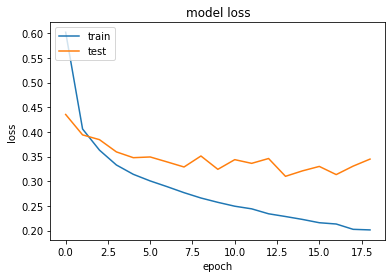

In [164]:
batch_size = 200
epochs = 400   # Setting up higher epoch in persuit of finding global moinima,
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)   # Set up early stopping to avoid wastage of computing power
                                                                            # Kept patience level to 5 to check for considerable time to get out of local minima if possible
    
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    callbacks = [es],
                    validation_data=(X_test, y_test)
                    )


score = model.evaluate(X_test, y_test, verbose=False)

print()
print ('Test loss:', round(score[0], 3))
print ('Test accuracy:', round(score[1], 3))


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [165]:
model.evaluate(X_test, y_test, verbose=False)

[0.3450450897216797, 0.885200023651123]